In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.html.widgets import interact
%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context("notebook")
plt.style.use('dark_background')

In [20]:
np.random.seed(123)

In [13]:
MMC = 100
xmc = np.random.rand(MMC)
ymc = np.random.rand(MMC)
r = (xmc **2 + ymc ** 2) ** 0.5
accept = np.where(r <=1, 1, 0)
accept_ratio = np.sum(accept) / MMC
print(accept_ratio)

0.82


In [28]:
MMC = 100
xmc = np.random.rand(MMC)
ymc = np.random.rand(MMC)
@interact(mcs=(0, MMC, 1))
def animation(mcs=0):
    plt.figure(figsize=(6,6))
    plt.xlim([0,1])
    plt.ylim([0,1])
    x = np.arange(0,1, 0.001)
    y = (1 - x**2)**0.5
    y2 = np.ones(x.shape[0])
    plt.plot(x,y)
    plt.fill_between(x, y, alpha=0.3, color='yellowgreen')
    plt.fill_between(x, y, y2, alpha=0.3, color='deepskyblue')
    r = (xmc[:mcs]**2 + ymc[:mcs]**2)**0.5
    accept = np.where(r <=1, 1, 0)
    accept_ratio = np.sum(accept) / mcs
    plt.scatter(xmc[:mcs], ymc[:mcs], color='white', marker=".")
    print("monte carlo", accept_ratio)
    print("analytical solution", np.pi / 4.0)

interactive(children=(IntSlider(value=0, description='mcs'), Output()), _dom_classes=('widget-interact',))

Text(0,0.5,'accept ratio')

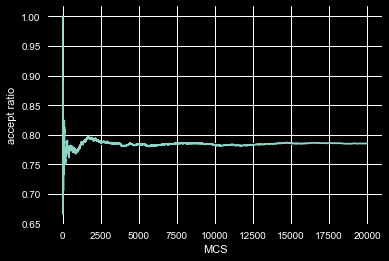

In [29]:
pi_mcs = []
NMC = 20000
xmc = np.random.rand(NMC)
ymc = np.random.rand(NMC)
for mcs in range(1,NMC):
    r = (xmc[:mcs] ** 2 + ymc[:mcs] ** 2) ** 0.5
    accept = np.where(r<=1, 1, 0)
    accept_ratio = np.sum(accept) / mcs
    pi_mcs.append(accept_ratio)

pi_x = np.arange(len(pi_mcs)) + 1

plt.plot(pi_x, pi_mcs)
plt.hlines(0.785, pi_x[0], pi_x[-1], linestyles="dashed")
plt.xlabel("MCS")
plt.ylabel("accept ratio")